In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn import cluster
import os

In [93]:
# Load csv file 
df = pd.read_csv('./preprocessed_data/norm_data_standardized.csv', index_col=False)
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,0.206788,-0.699494,-0.742767,-0.632794,-0.549168,-0.695776,-0.179534,-0.611387,-0.343666,2.0
1,0.206788,0.283642,0.266684,0.768071,1.708882,1.779975,-0.179534,-0.283909,-0.343666,2.0
2,-0.503505,-0.699494,-0.742767,-0.632794,-0.549168,-0.420693,-0.179534,-0.611387,-0.343666,2.0
3,0.561934,1.594490,1.612618,-0.632794,-0.097558,0.129474,-0.179534,1.353485,-0.343666,2.0
4,-0.148359,-0.699494,-0.742767,0.067638,-0.549168,-0.695776,-0.179534,-0.611387,-0.343666,2.0


In [94]:
data_df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,0,3,1,1,2
1,5,4,4,5,7,1,3,2,1,2
2,3,1,1,1,2,0,3,1,1,2
3,6,8,8,1,3,0,3,7,1,2
4,4,1,1,3,2,0,3,1,1,2


In [95]:
X = data_df.drop(['Class'],axis=1)
y = data_df['Class']


In [86]:
X.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,0.234621,3.437768,2.866953,1.589413
std,2.815741,3.051459,2.971913,2.855379,2.214300,0.424065,2.438364,3.053634,1.715078
min,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,1.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,0.000000,3.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,0.000000,5.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,10.000000,10.000000,10.000000


In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bare Nuclei                  699 non-null    int64
 6   Bland Chromatin              699 non-null    int64
 7   Normal Nucleoli              699 non-null    int64
 8   Mitoses                      699 non-null    int64
dtypes: int64(9)
memory usage: 49.3 KB


In [5]:
# Initialise centroids
def initialize_centroids(X,K):
    
    #Randomize Traininng inidcies
    randomized_X = np.random.permutation(X.shape[0])
    
    #Get the training cluster indicies for number of clusters
    centroid_indx = randomized_X[:K]

    centroids = X[centroid_indx]
    
    return centroids

In [6]:
# Assign points to centroids
def assign_points_centroids(X,centroids):
    #Expand X dimensions in order to get correct shapes
    X = np.expand_dims(X,axis=1)
    #Calculate the norm
    distance = np.linalg.norm((X - centroids),axis=-1)
    #assign clusters to points that minimize our cost
    points = np.argmin(distance, axis=1)
    return points

In [8]:
# Compute mean
def compute_mean(X,points,K):
    #Intialize empty array to store our centroids
    centroids = np.zeros((K, X.shape[1]))
    
    #Iterate over each cluster and assign it to the mean of it's points
    for i in range(K):
        centroid_mean = X[points ==i].mean(axis=0)
        centroids[i] = centroid_mean
    return centroids

In [9]:
# Run k-means
def KMeans(X, K, iterations=10):
    
    #Initialize centroids
    centroids= initialize_centroids(X, K) 
    
    #Iterate for specified iterations
    for i in range(iterations):
        
        points = assign_points_centroids(X, centroids)#get points assigned to each cluster

        centroids = compute_mean(X, points, K) #update the centroids to the mean of it's points

    return centroids,points

In [96]:
X = X.values
K = 3
centroids, points = KMeans(X, K, 10000)

In [97]:
points

array([0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 2, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 2, 1, 2,
       1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 2, 2, 1, 2, 0, 2, 2, 0, 1, 2, 0, 2,
       0, 2, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 1, 0, 2,
       0, 2, 2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 2, 0, 2, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 1, 0,
       0, 2, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1,
       0, 1, 0, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 2, 1, 0, 1, 1, 0, 1, 2, 1, 2, 2, 0, 0, 1, 1, 1, 2, 0, 0,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2, 1, 1, 2,
       1, 0, 2, 2, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1,
       1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 2, 0, 0, 2, 1,

In [98]:
centroids

array([[2.88988764, 1.21573034, 1.33932584, 1.26067416, 2.01797753,
        0.00898876, 2.02247191, 1.14157303, 1.06516854],
       [7.20833333, 8.22222222, 7.86111111, 6.58333333, 6.36805556,
        0.63888889, 6.79861111, 7.40972222, 3.13888889],
       [6.94545455, 4.23636364, 4.67272727, 4.11818182, 3.93636364,
        0.61818182, 4.76363636, 3.9       , 1.68181818]])

In [99]:
x1 = X[points == 0, 0]
x2 = X[points == 0, 1]
x3 = X[points == 0, 2]

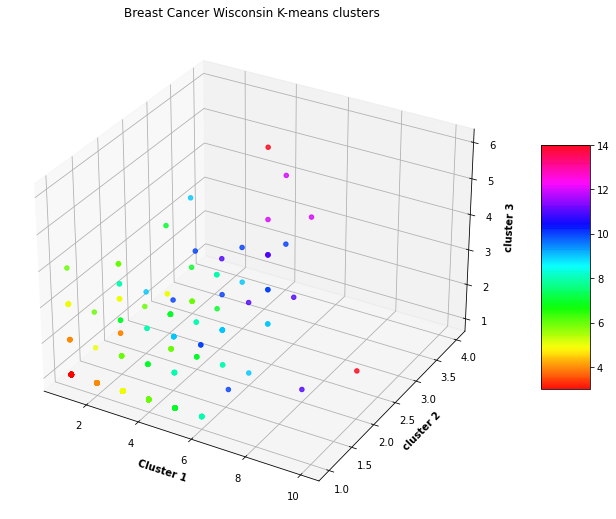

In [101]:
# Creating figure
fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
# Add x, y gridlines
ax.grid(b = True, color ='grey',linestyle ='-.', linewidth = 0.3,alpha = 0.2)
# Creating color map
my_cmap = plt.get_cmap('hsv')
# Creating plot
sctt = ax.scatter3D(x1, x2, x3,alpha = 0.8,c = (x1 + x2 + x3),cmap = my_cmap,marker ='o')
plt.title("Breast Cancer Wisconsin K-means clusters")
ax.set_xlabel('Cluster 1', fontweight ='bold')
ax.set_ylabel('cluster 2', fontweight ='bold')
ax.set_zlabel('cluster 3', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
# show plot
plt.show()

In [103]:
# Evaluation
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=X[points == 0, 0], y=X[points == 0, 1],
    mode='markers',marker_color='#DB4CB2',name='Cluster 1'
))

fig.add_trace(go.Scatter(
    x=X[points == 1, 0], y=X[points == 1, 1],
    mode='markers',marker_color='#7CFC00',name='Cluster 2'
))

fig.add_trace(go.Scatter(
    x=X[points == 2, 0], y=X[points == 2, 1],
    mode='markers',marker_color='#7D3AC1',name='cluster 3'
))

fig.add_trace(go.Scatter(
    x=centroids[:, 0], y=centroids[:,1],
    mode='markers',marker_color='#CAC9CD',marker_symbol=4,marker_size=13,name='Centroids'
))
fig.update_layout(template='seaborn',width=1000, height=500,)